In [13]:
#This is the juniper notebook for Programming assignment 3 - by John C. Onwugbonu

Question 1.
a - Downloaded dataset into Local drive - done.

b. How to run mlxtend - in terminal run pip install mlxtend 
c.See below

In [14]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import  association_rules, apriori, fpmax, fpgrowth
import csv

#reading csv file and initializing data as a list
file = open(r'C:\Users\jcmon\Desktop\Master-Classes\DataMining1\ProgrammingAssignment3\Grocery_Items_30.csv', mode = 'r')
itemSetData = csv.reader(file)
itemSetData = list(itemSetData)
te = TransactionEncoder()
te_ary = te.fit(itemSetData).transform(itemSetData)
df1 = pd.DataFrame(te_ary, columns=te.columns_)
#using apiori to create our frequent itemset
frequent_itemset = apriori(df1, min_support=0.01)
frequent_itemset

#creating our association rules 
association_rules(frequent_itemset, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(13),(0),0.023497,0.999875,0.023497,1.000000,1.000125,0.000003,inf,0.000128
1,(20),(0),0.033496,0.999875,0.033496,1.000000,1.000125,0.000004,inf,0.000129
2,(21),(0),0.021872,0.999875,0.021872,1.000000,1.000125,0.000003,inf,0.000128
3,(22),(0),0.018373,0.999875,0.018373,1.000000,1.000125,0.000002,inf,0.000127
4,(23),(0),0.045869,0.999875,0.045869,1.000000,1.000125,0.000006,inf,0.000131
...,...,...,...,...,...,...,...,...,...,...
76,"(133, 175)",(0),0.013498,0.999875,0.013498,1.000000,1.000125,0.000002,inf,0.000127
77,(133),"(0, 175)",0.112236,0.157480,0.013498,0.120267,0.763697,-0.004177,0.957700,-0.258456
78,"(0, 176)",(175),0.089239,0.157480,0.012373,0.138655,0.880462,-0.001680,0.978145,-0.129731
79,"(176, 175)",(0),0.012373,0.999875,0.012373,1.000000,1.000125,0.000002,inf,0.000127


d. Using minsup of 0.0001, 0.005, 0.01, and 0.05
and a minconf of 0.05, 0.075,0.1
for each pair of msv and mct, find the number of association rules extracted from dataset. Constuct a heat map using seaborn


2059
1438
1076
300
249
187
104
98
81
22
16
14
defaultdict(<class 'list'>, {'0.05': [2059, 300, 104, 22], '0.075': [1438, 249, 98, 16], '0.1': [1076, 187, 81, 14]})


,0.05,0.075,0.1
0.001,2059,1438,1076
0.005,300,249,187
0.010,104,98,81
0.050,22,16,14


,0.001,0.005,0.010,0.050
0.05,2059,300,104,22
0.075,1438,249,98,16
0.1,1076,187,81,14


<AxesSubplot: >

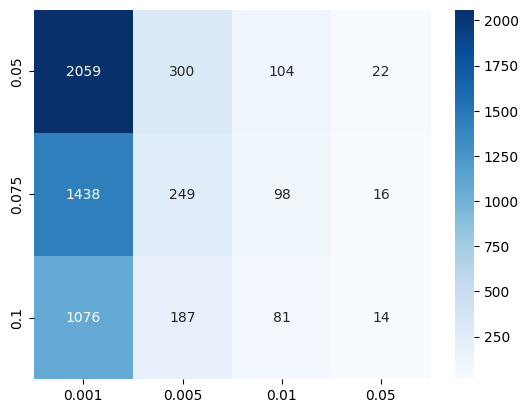

In [15]:

#creating the rules with the minsup and minconf values
from collections import defaultdict
association_rules_list = []
alldata = []
data = defaultdict(list)
msvs = [0.001, 0.005, 0.01, 0.05]
mcts = [0.05, 0.075, 0.1]
for msv in msvs:
    frequent_itemset = apriori(df1, min_support=msv)
    rule_count =[]
    for mct in mcts:
       x = association_rules(frequent_itemset, metric="confidence", min_threshold=mct)
       print(len(x))
       y = (len(x))
       rule_count.append(y)
       data[str(mct)].append(y)
       association_rules_list.append(x)
    alldata.append(rule_count)

print(data)
#print(data)

association_rules_list
#creating our dataFrame for the heatmap

df = pd.DataFrame(data, index=msvs)

display(df)
#swaping the axes to match what is described in the assignment
df = df.swapaxes("index", "columns")
display(df)

#creating the born heatmap now that I have my list of association rules
import seaborn as sbn
from matplotlib import pyplot as plt
import numpy as np

sbn.heatmap(df, cmap="Blues", annot=True, fmt=".0f")


Showing rules that have the highest confidence 

In [16]:
frequent_itemset1 = fpgrowth(df1, min_support=0.005)
x1 = association_rules(frequent_itemset1, metric="confidence", min_threshold=.5)
x1 = x1[["antecedents", "consequents", "confidence"]]
x1

,antecedents,consequents,confidence
0,(114),(0),1.0
1,"(114, 175)",(0),1.0
2,(31),(0),1.0
3,(176),(0),1.0
4,"(176, 133)",(0),1.0
...,...,...,...
119,(21),(0),1.0
120,(139),(0),1.0
121,(65),(0),1.0
122,(57),(0),1.0


The confidence value that is the highest in the rules is 1.0

2. Image Classification using CNN

In [17]:
import os
import pathlib
WDS = pd.read_csv(
    "/Users/jcmon/Desktop/Master-Classes/DataMining1/Coding-Assignment1/DataMiningRepo1/Weed-4class-30/Weed-4class-30-labels.csv")
nWDS = pd.read_csv(
    "/Users/jcmon/Desktop/Master-Classes/DataMining1/Coding-Assignment1/DataMiningRepo1/Negatives/Negatives.csv")

rVines = WDS[WDS['Species'] == 'Rubber vine']
cApple = WDS[WDS['Species'] == 'Chinee apple']
sWeed = WDS[WDS['Species'] == 'Siam weed']

rVineFiles = [str(pathlib.Path.cwd()/"Weed-4class-30"/ fn[0])
              for fn in rVines.values]
cAppleFiles = [str(pathlib.Path.cwd()/"Weed-4class-30"/ fn[0])
              for fn in cApple.values]
sWeedFiles = [str(pathlib.Path.cwd()/"Weed-4class-30"/ fn[0])
              for fn in sWeed.values]

In [18]:
import cv2 as cv
classes = ['rVineClass', 'cAppleClass',"sWeedClass"]
print(classes[0])
CorrectClass = []
dataset = []
ourInt = 0
for i in rVineFiles:
    image = cv.imread(i)
    dataset.append(image)
    CorrectClass.append(ourInt)
ourInt = ourInt +1

rVineClass


In [19]:
image = cv.imread(rVineFiles[0])
image.shape

(256, 256, 3)

In [20]:
for i in cAppleFiles:
    image = cv.imread(i)
    dataset.append(image)
    CorrectClass.append(ourInt)
ourInt = ourInt +1

In [21]:
for i in sWeedFiles:
    image = cv.imread(i)
    dataset.append(image)
    CorrectClass.append(ourInt)

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

num_classes =4

#Model/Data Params
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, CorrectClass, test_size=.2)
X_train= np.array(X_train)
X_test= np.array(X_test)
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (2566, 256, 256, 3, 1)
2566 train samples
642 test samples


In [23]:
model = keras.Sequential(
    [
        keras.Input(shape=(256,256,3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dropout (Dropout)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 4)                 2064516   
                                                                 
Total params: 2,065,412
Trainable params: 2,065,412
Non-trainable params: 0
______________________________________________

In [29]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/5
17/17 [==============================] - 56s 3s/step - loss: 0.7984 - accuracy: 0.7018 - val_loss: 0.8268 - val_accuracy: 0.6751
Epoch 2/5
17/17 [==============================] - 65s 4s/step - loss: 0.4872 - accuracy: 0.9162 - val_loss: 0.7221 - val_accuracy: 0.6654
Epoch 3/5
17/17 [==============================] - 66s 4s/step - loss: 0.2946 - accuracy: 0.9128 - val_loss: 1.3151 - val_accuracy: 0.5058
Epoch 4/5
17/17 [==============================] - 65s 4s/step - loss: 0.2892 - accuracy: 0.9225 - val_loss: 0.7535 - val_accuracy: 0.6829
Epoch 5/5
17/17 [==============================] - 65s 4s/step - loss: 0.1669 - accuracy: 0.9664 - val_loss: 0.9061 - val_accuracy: 0.6420


In [ ]:
numOfEpoch =  [1,2,3,4,5]
acc =  [0.7018 , 0.9162, 0.9128, 0.9225, 0.9664]
val_acc = [0.6751, 0.6654, 0.5058, 0.6829, 0.6420] 


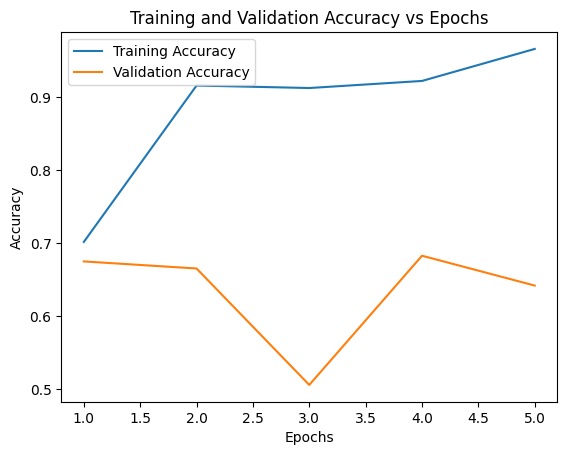

In [30]:
import matplotlib.pyplot as plt

numOfEpoch = [1, 2, 3, 4, 5]
acc = [0.7018, 0.9162, 0.9128, 0.9225, 0.9664]
val_acc = [0.6751, 0.6654, 0.5058, 0.6829, 0.6420]

plt.plot(numOfEpoch, acc, label='Training Accuracy')
plt.plot(numOfEpoch, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()

In [25]:
model1 = keras.Sequential(
    [
        keras.Input(shape=(256,256,3)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 508032)            0         
                                                                 
 dropout_1 (Dropout)         (None, 508032)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2032132   
                                                                 
Total params: 2,034,564
Trainable params: 2,034,564
Non-trainable params: 0
____________________________________________

In [31]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/5
17/17 [==============================] - 51s 3s/step - loss: 0.8524 - accuracy: 0.8056 - val_loss: 0.7838 - val_accuracy: 0.6362
Epoch 2/5
17/17 [==============================] - 51s 3s/step - loss: 0.3211 - accuracy: 0.9537 - val_loss: 0.7343 - val_accuracy: 0.6770
Epoch 3/5
17/17 [==============================] - 56s 3s/step - loss: 0.1460 - accuracy: 0.9771 - val_loss: 0.7481 - val_accuracy: 0.6770
Epoch 4/5
17/17 [==============================] - 54s 3s/step - loss: 0.0875 - accuracy: 0.9893 - val_loss: 0.7870 - val_accuracy: 0.6615
Epoch 5/5
17/17 [==============================] - 54s 3s/step - loss: 0.0677 - accuracy: 0.9951 - val_loss: 0.7547 - val_accuracy: 0.7023


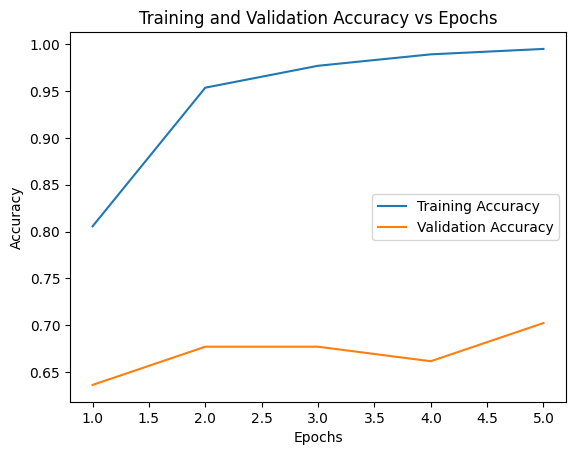

In [32]:
numOfEpoch = [1, 2, 3, 4, 5]
acc = [0.8056, 0.9537, 0.9771, 0.9893, 0.9951]
val_acc = [0.6362, 0.6770, 0.6770, 0.6615, 0.7023]

plt.plot(numOfEpoch, acc, label='Training Accuracy')
plt.plot(numOfEpoch, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()

In [27]:
model = keras.Sequential(
    [
        keras.Input(shape=(256,256,3)),
        layers.Conv2D(32, kernel_size=(7, 7), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 250, 250, 32)      4736      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 500000)            0         
                                                                 
 dropout_2 (Dropout)         (None, 500000)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 2000004   
                                                                 
Total params: 2,004,740
Trainable params: 2,004,740
Non-trainable params: 0
____________________________________________

In [33]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/5
17/17 [==============================] - 65s 4s/step - loss: 0.5719 - accuracy: 0.8728 - val_loss: 0.8133 - val_accuracy: 0.6265
Epoch 2/5
17/17 [==============================] - 73s 4s/step - loss: 0.1440 - accuracy: 0.9888 - val_loss: 0.7613 - val_accuracy: 0.7004
Epoch 3/5
17/17 [==============================] - 73s 4s/step - loss: 0.0503 - accuracy: 0.9981 - val_loss: 1.0285 - val_accuracy: 0.6304
Epoch 4/5
17/17 [==============================] - 72s 4s/step - loss: 0.0453 - accuracy: 0.9961 - val_loss: 0.8360 - val_accuracy: 0.6634
Epoch 5/5
17/17 [==============================] - 84s 5s/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.8816 - val_accuracy: 0.6946


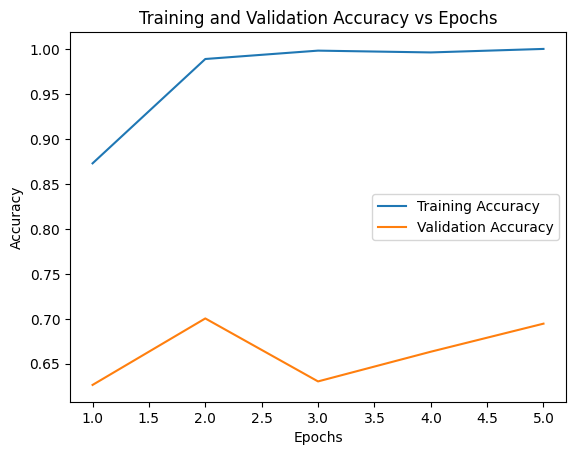

In [34]:
numOfEpoch = [1, 2, 3, 4, 5]
acc = [0.8728, 0.9888, 0.9981, 0.9961, 1]
val_acc = [0.6265, 0.7004, 0.6304, 0.6634, 0.6946]

plt.plot(numOfEpoch, acc, label='Training Accuracy')
plt.plot(numOfEpoch, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()